# Implementation of Decision tree using sklearn library

## Short Description About Project 

Wine quality is a very important part for consumers as well as for the
manufacturing industry. Every human has his or her own opinion about testing, so
determining wine quality based on human experts is a daunting task. There are
several characteristics for predicting wine quality, but not all are suitable for better
prediction. Intended to implement machine learning classifier algorithms such as
decision trees, using wine quality dataset. The red wine dataset contains 1599 cases
and the white wine dataset contains Input characteristics based on physicochemical
tests and output variables based on sensory data are classified into 11 quality
categories from 0 to 10 (0 Very Bad to 10 Very Good).

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Statistical Information

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Note :-

Students will perform the data profiling part for the dataset themselves in which students need to show :-
    
    1) Shape of dataset
    
    2) count null value present in dataset
    
    3) datatype of columns
    
    4) duplicate data 
    
    5) number of categorical and numerical features

## Explotary data analysis (EDA)

Students will perform the EDA part for the dataset themselves in which students need to show :-
    
    1) boxplot for detecting outliers
    
    2) barplot to show distribution of data
    
    3) correlation graph / heatmap

## Split dataset into train and test data

In [28]:
X = data.drop(columns = 'Outcome')
y = data['Outcome']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [30]:
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((537, 8), (231, 8), (537,), (231,))

## Implement decision tree on complete dataset

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
# accuracy of our classification tree for train data
model.score(x_train,y_train)

1.0

In [11]:
# accuracy of our classification tree for test data
model.score(x_test,y_test)

0.683982683982684

As u clearly seen our model is overfitted So, we need to remove this. 

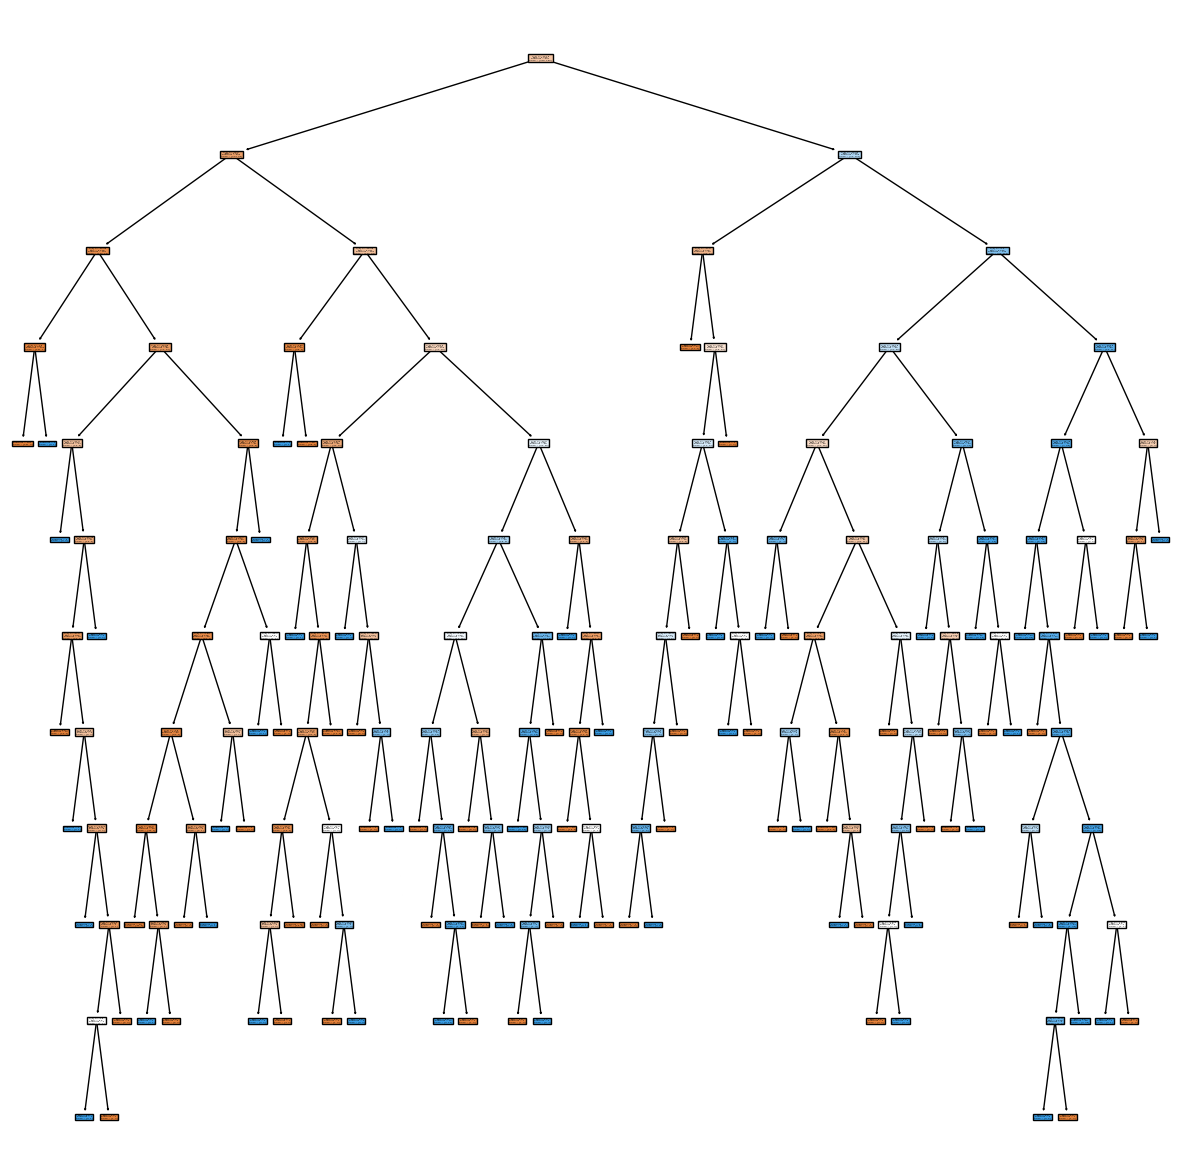

In [12]:
## Draw decision tree
from sklearn import tree
fig = plt.figure(figsize = (15,15))
tree.plot_tree(model,filled = True)
plt.show()

Now we have doing hyper parameter tunings for improving our score and remove overfitness of our model.

Students need to study this site article before going to further. So, please stop the video and read it.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Students need to study parameter of decision tree from this article 

Now try to tune some hyperparameters using the GridSearchCV algorithm.

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.
It does a exhaustive generation of combination of different parameters passed.
Using cross validation score(cv), Grid Search returns the combination of hyperparameters for which the model is performing the best. 

In [13]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'] 
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=7,n_jobs =-1)

In [16]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [18]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 9, 'min_samples_split': 7, 'splitter': 'random'}


In [31]:
grid_search.best_score_

0.780221658041207

In [32]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth =15, min_samples_leaf= 1, min_samples_split= 3, splitter ='best',random_state= 89)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=3, random_state=89)

In [33]:
model.score(x_test,y_test)

0.6406926406926406

Note : we must understand that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

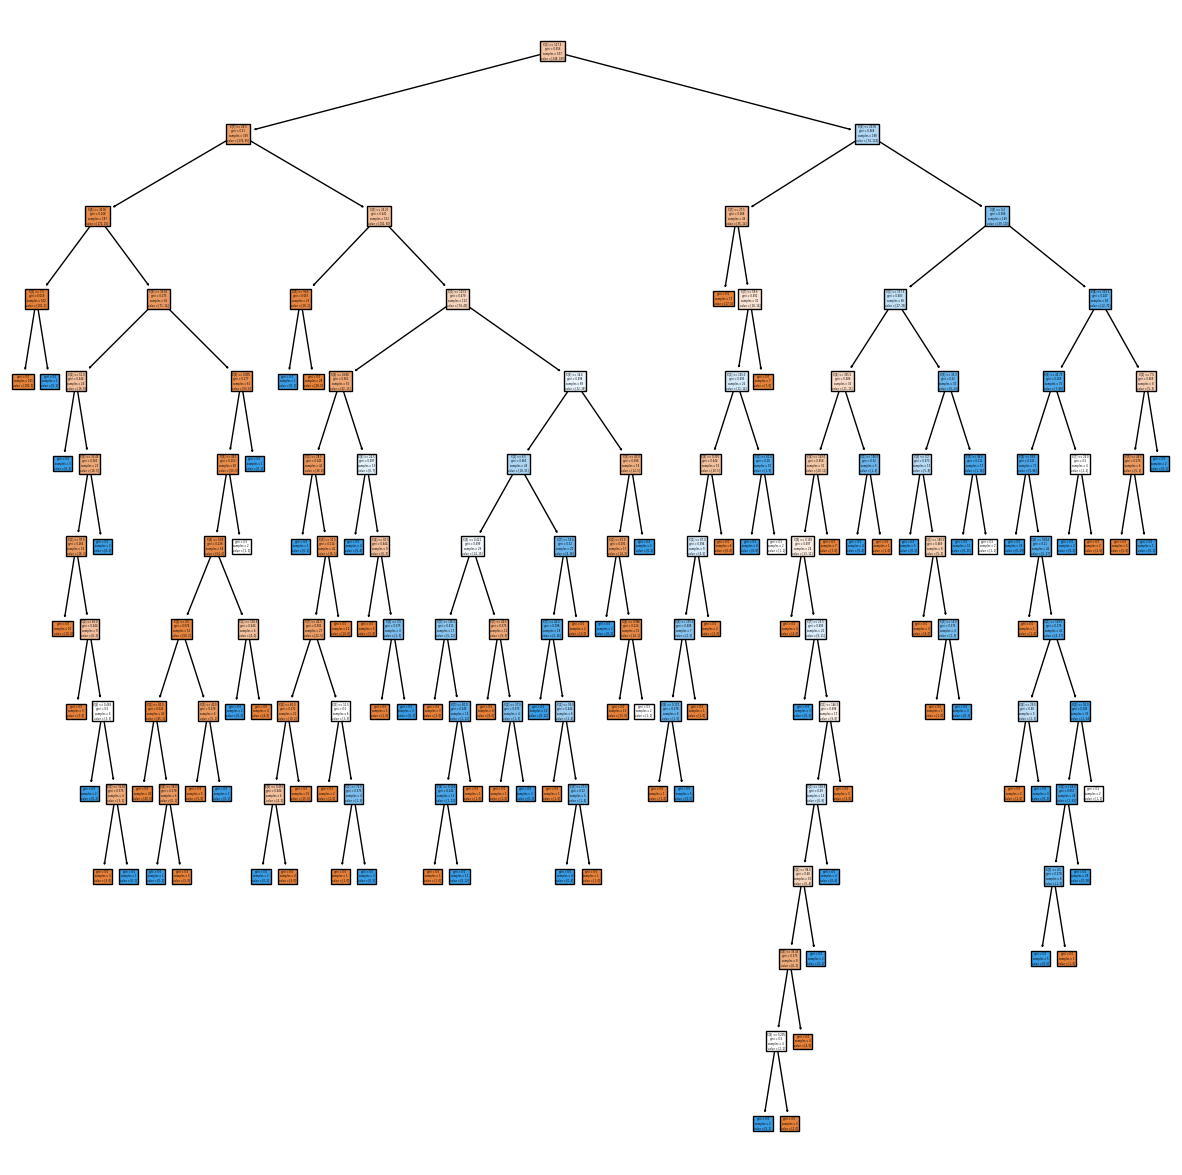

In [34]:
## Draw decision tree
from sklearn import tree
fig = plt.figure(figsize = (15,15))
tree.plot_tree(model,filled = True)
plt.show()

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score , classification_report

In [36]:
y_pred = model.predict(x_test)
confusion_matrix(y_test , y_pred)

array([[115,  37],
       [ 46,  33]], dtype=int64)

<Figure size 700x700 with 0 Axes>

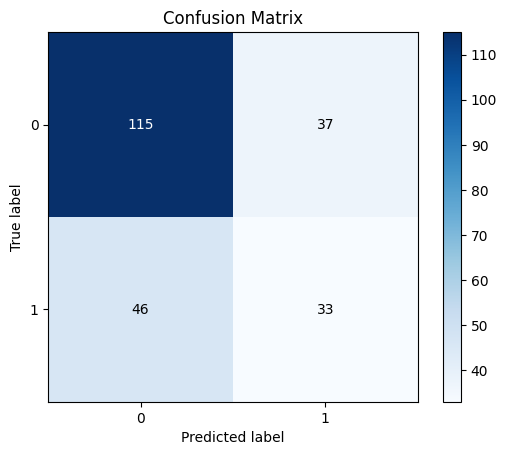

In [37]:
import scikitplot
plt.figure(figsize = (7,7))
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       152
           1       0.47      0.42      0.44        79

    accuracy                           0.64       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.63      0.64      0.64       231



## Feature selection on the bases of Information gain

Checking The Information Gain for the features :-

IG calculates the importance of each feature by measuring the increase in entropy when the feature is given vs. absent. Algorithm: IG(S, a) = H(S) — H(S | a) Where IG(S, a) is the information for the dataset S for the variable a for a random variable, H(S) is the entropy for the dataset before any change (described above) and H(S | a) is the conditional entropy for the dataset in the presence of variable a.

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

def FeatureInfoGain(X, y):
    bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all') # k is number of features you want to select
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']
    return featureScores

In [33]:
featureScores = FeatureInfoGain(X, y)
featureScores

,Specs,Score
0,fixed acidity,0.065815
1,volatile acidity,0.104627
2,citric acid,0.066601
3,residual sugar,0.019222
4,chlorides,0.059358
5,free sulfur dioxide,0.021889
6,total sulfur dioxide,0.081038
7,density,0.078900
8,pH,0.021998
9,sulphates,0.099010


In [34]:
featureScores.sort_values(by = "Score",ascending=False)

,Specs,Score
10,alcohol,0.172690
1,volatile acidity,0.104627
9,sulphates,0.099010
6,total sulfur dioxide,0.081038
7,density,0.078900
2,citric acid,0.066601
0,fixed acidity,0.065815
4,chlorides,0.059358
8,pH,0.021998
5,free sulfur dioxide,0.021889


Note :-
    
Students will select the top 5 or 6 features from the dataset based on their information gained value and try to implement a decision tree on that.